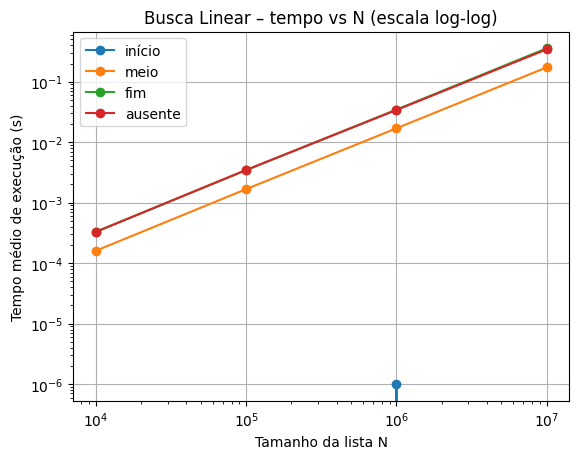

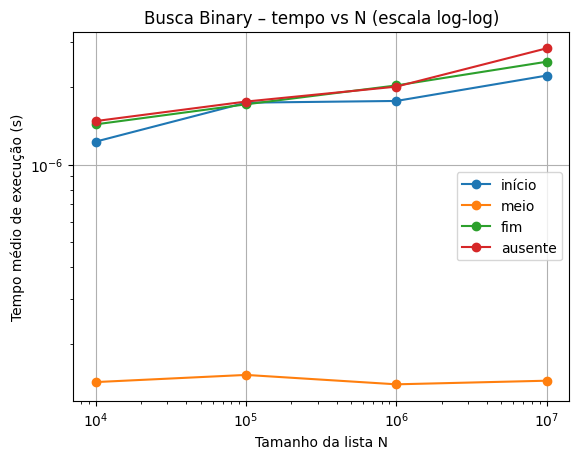

In [6]:
import time
import pandas as pd
import matplotlib.pyplot as plt

# Funções de busca
def linear_search(arr, target):
    for i, value in enumerate(arr):
        if value == target:
            return i
    return -1

def binary_search(arr, target):
    left, right = 0, len(arr) - 1
    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return -1

# Função de medida média
def avg_time(func, arr, target, repeats):
    t0 = time.time()
    for _ in range(repeats):
        func(arr, target)
    t1 = time.time()
    return (t1 - t0) / repeats

# Parâmetros do experimento
sizes = [10**4, 10**5, 10**6, 10**7]
scenarios = [
    ("início",  lambda N: 1),
    ("meio",    lambda N: N // 2),
    ("fim",     lambda N: N),
    ("ausente", lambda N: N + 1),
]
repeats = {"linear": 1_000, "binary": 100_000}

# Coleta dos dados
records = []
for N in sizes:
    arr = list(range(1, N + 1))
    for name, pos_fn in scenarios:
        target = pos_fn(N)
        t_lin = avg_time(linear_search, arr, target, repeats["linear"])
        records.append({"algorithm": "linear", "scenario": name, "N": N, "time": t_lin})
        t_bin = avg_time(binary_search, arr, target, repeats["binary"])
        records.append({"algorithm": "binary", "scenario": name, "N": N, "time": t_bin})

# Criação do DataFrame
df = pd.DataFrame(records)

# Gráfico para cada algoritmo
for algo in ["linear", "binary"]:
    df_algo = df[df["algorithm"] == algo]
    plt.figure()
    for scenario in df_algo["scenario"].unique():
        df_s = df_algo[df_algo["scenario"] == scenario]
        plt.plot(df_s["N"], df_s["time"], marker="o", label=scenario)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Tamanho da lista N")
    plt.ylabel("Tempo médio de execução (s)")
    plt.title(f"Busca {algo.capitalize()} – tempo vs N (escala log-log)")
    plt.legend()
    plt.grid(True)
    plt.show()
